In [1]:
import pandas as pd

In [2]:
# Import sources e, b, and i into 3 DataFrames

e_df = pd.read_csv('pdts_fixing_e.csv')
b_df = pd.read_csv('pdts_fixing_b.csv')
i_df = pd.read_csv('pdts_fixing_i.csv')

In [7]:
e_df.head(10)

,date,isin,desc,e_bid
0,2020-01-02,RU000A0JWHA4,RUSSIA 4 3/4 05/27/26,111.59
1,2020-01-02,RU000A0JXTS9,RUSSIA 4 1/4 06/23/27,109.00
2,2020-01-02,RU000A0JXU14,RUSSIA 5 1/4 06/23/47,125.41
3,2020-01-02,RU000A0ZYYN4,RUSSIA 4 3/8 03/21/29,110.75
4,2020-01-02,RU000A1006S9,RUSSIA 5.1 03/28/35,119.50
5,2020-01-02,US035198AD29,ANGOL 8 11/26/29,107.75
6,2020-01-02,US035198AE02,ANGOL 9 1/8 11/26/49,107.97
7,2020-01-02,US03846JX212,EGYPT 7.0529 01/15/32,105.19
8,2020-01-02,US040114GK09,ARGENT 3 3/4 12/31/38,46.69
9,2020-01-02,US040114GL81,ARGENT 8.28 12/31/33,60.75


In [8]:
b_df.head()

,date,isin,b_bid,b_mid,b_ask
0,2020-01-02,RU000A0JWHA4,111.4650,111.607500,111.7500
1,2020-01-02,RU000A0JXTS9,108.9690,109.246750,109.5245
2,2020-01-02,RU000A0JXU14,125.0900,125.290000,125.4900
3,2020-01-02,RU000A0ZYYN4,110.7885,111.042747,111.2970
4,2020-01-02,RU000A1006S9,119.3570,119.649246,119.9415


In [9]:
i_df.head()

,date,isin,i_bid,i_mid,i_ask
0,2020-01-30,RU000A0JWHA4,112.7500,112.9246,113.0992
1,2020-01-30,RU000A0JXTS9,110.2638,110.4395,110.6152
2,2020-01-30,RU000A0JXU14,129.7480,129.8740,130.0000
3,2020-01-30,RU000A0ZYYN4,112.3664,112.5135,112.6606
4,2020-01-30,RU000A1006S9,121.5910,121.7955,122.0000


In [6]:
# Simplify column names and specify source for price quotes (within column name)

e_df.rename(columns={'Trade_Date': 'date', 'ISIN': 'isin', 'Security_Des': 'desc', 'PX_Bid': 'e_bid'}, inplace=True)
b_df.rename(columns={'Trade_Date': 'date', 'ISIN': 'isin', 'PX_Bid': 'b_bid', 'PX_Mid': 'b_mid', 'PX_Ask': 'b_ask'}, inplace=True)
i_df.rename(columns={'Trade_Date': 'date', 'ISIN': 'isin', 'PX_Bid': 'i_bid', 'PX_Mid': 'i_mid', 'PX_Ask': 'i_ask'}, inplace=True)

In [10]:
# Create unique ID to index price quotes by combining date and ISIN

e_df['unique_id'] = e_df['date'] + ' ' + e_df['isin']
b_df['unique_id'] = b_df['date'] + ' ' + b_df['isin']
i_df['unique_id'] = i_df['date'] + ' ' + i_df['isin']

In [11]:
# Drop date and ISIN columns, and set index to unique ID containing both

e1_df = e_df.drop(['date', 'isin'], axis=1).set_index('unique_id')
b1_df = b_df.drop(['date', 'isin'], axis=1).set_index('unique_id')
i1_df = i_df.drop(['date', 'isin'], axis=1).set_index('unique_id')

In [12]:
# Creates DataFrame which only contains unique IDs shared by all 3 sources.
# In other words, if a specific quote is in source e and source b, but not source i, it is excluded from df_ebi

ebi_df = pd.concat([e1_df, b1_df, i1_df], axis=1, join='inner')

In [15]:
ebi_df.head()

,desc,e_bid,b_bid,b_mid,b_ask,i_bid,i_mid,i_ask,issuer,bond_yield,maturity
unique_id,,,,,,,,,,,
2020-01-30 RU000A0JWHA4,RUSSIA 4 3/4 05/27/26,112.81,112.830,112.972500,113.1150,112.7500,112.9246,113.0992,RUSSIA,"[4, 3/4]",05/27/26
2020-01-30 RU000A0JXTS9,RUSSIA 4 1/4 06/23/27,110.30,110.153,110.366249,110.5795,110.2638,110.4395,110.6152,RUSSIA,"[4, 1/4]",06/23/27
2020-01-30 RU000A0JXU14,RUSSIA 5 1/4 06/23/47,129.84,129.840,130.050000,130.2600,129.7480,129.8740,130.0000,RUSSIA,"[5, 1/4]",06/23/47
2020-01-30 RU000A0ZYYN4,RUSSIA 4 3/8 03/21/29,112.40,112.313,112.490000,112.6670,112.3664,112.5135,112.6606,RUSSIA,"[4, 3/8]",03/21/29
2020-01-30 RU000A1006S9,RUSSIA 5.1 03/28/35,121.40,121.413,121.654747,121.8965,121.5910,121.7955,122.0000,RUSSIA,[5.1],03/28/35


In [14]:
# Get bond issuer from description column

ebi_df['issuer'] = ebi_df['desc'].str.split().apply(lambda x: x[0])


# Get bond yield – returns yield in list of strings – still working on how to change to single float value

ebi_df['bond_yield'] = ebi_df['desc'].str.split().apply(lambda x: x[1:-1])


# Get maturity date

ebi_df['maturity'] = ebi_df['desc'].str.split().apply(lambda x: x[-1])


In [16]:
# Compare bid prices first since they are available from all 3 sources
# Use source b as a baseline – e-b_bid shows how much higher or lower the bid quote from source e is etc.


ebi_df['e-b_bid'] = ebi_df['e_bid'] - ebi_df['b_bid']

ebi_df['i-b_bid'] = ebi_df['i_bid'] - ebi_df['b_bid']

In [17]:
ebi_df['e-b_bid'].describe()

count    43222.000000
mean         0.023967
std          0.716730
min        -19.810670
25%         -0.119671
50%          0.037670
75%          0.195000
max         43.889330
Name: e-b_bid, dtype: float64

In [18]:
ebi_df['i-b_bid'].describe()

count    43222.000000
mean         0.037264
std          0.773872
min        -17.722668
25%         -0.160332
50%          0.006000
75%          0.186000
max         45.260352
Name: i-b_bid, dtype: float64

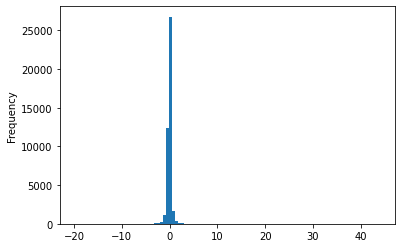

In [21]:
# Plot distribution of e-b_bid

ebi_df['e-b_bid'].plot.hist(bins=100)

In [24]:
# Consider e-b_bid values 2 standard deviations above and below the mean

e_bid_std2 = 2 * ebi_df['e-b_bid'].std()
e_bid_std_2 = -2 * ebi_df['e-b_bid'].std()

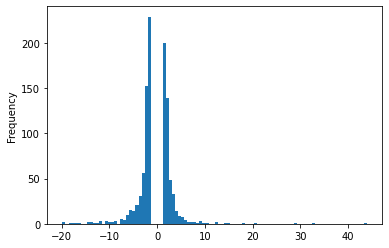

In [25]:
# Filter and plot e-b_bid values 2 standard deviations above and below the mean

filt_e_bid_both = (ebi_df['e-b_bid'] > (e_bid_std2)) | (ebi_df['e-b_bid'] < (e_bid_std_2))

ebi_df['e-b_bid'].loc[filt_e_bid_both].plot.hist(bins=100)

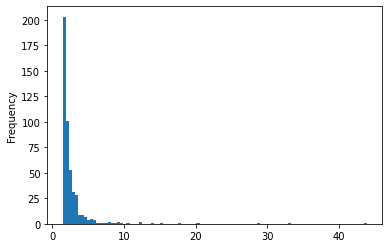

In [26]:
# Filter and plot e-b_bid values 2 standard deviations above the mean

filt_e_bid_above = (ebi_df['e-b_bid'] > (e_bid_std2))

ebi_df['e-b_bid'].loc[filt_e_bid_above].plot.hist(bins=100)

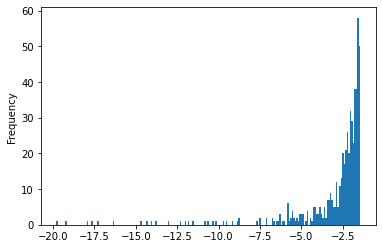

In [27]:
# Filter and plot e-b_bid values 2 standard deviations below the mean

filt_e_bid_below = (ebi_df['e-b_bid'] < (e_bid_std_2))  

ebi_df['e-b_bid'].loc[filt_e_bid_below].plot.hist(bins=199)

In [29]:
# View DataFrame filtered for values of e-b_bid 2 std dev above the mean
pd.set_option('display.max_rows', 50)

ebi_df.loc[filt_e_bid_above].sort_values(by='e-b_bid', ascending=False) 

,desc,e_bid,b_bid,b_mid,b_ask,i_bid,i_mid,i_ask,issuer,bond_yield,maturity,e-b_bid,i-b_bid
unique_id,,,,,,,,,,,,,
2020-03-19 US718286AY36,PHILIP 9 1/2 02/02/30,134.38,90.490670,114.054000,137.617340,135.751022,136.774521,137.798019,PHILIP,"[9, 1/2]",02/02/30,43.889330,45.260352
2020-03-18 US718286AY36,PHILIP 9 1/2 02/02/30,139.38,106.389664,124.866669,143.343658,142.669952,144.433456,146.196960,PHILIP,"[9, 1/2]",02/02/30,32.990336,36.280288
2020-04-29 XS1402929746,ADGB 3 1/8 05/03/26,105.47,76.564670,91.362830,106.161000,105.285200,105.672900,106.060600,ADGB,"[3, 1/8]",05/03/26,28.905330,28.720530
2020-03-19 US445545AF36,REPHUN 7 5/8 03/29/41,160.94,140.482000,140.937500,141.393000,139.000000,141.500000,144.000000,REPHUN,"[7, 5/8]",03/29/41,20.458000,-1.482000
2020-03-26 US445545AF36,REPHUN 7 5/8 03/29/41,156.62,138.793000,140.161500,141.530000,150.000000,152.069500,154.139000,REPHUN,"[7, 5/8]",03/29/41,17.827000,11.207000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-14 US698299BH68,PANAMA 4 1/2 04/16/50,110.50,109.055672,109.607330,110.159000,109.376000,110.126000,110.876000,PANAMA,"[4, 1/2]",04/16/50,1.444328,0.320328
2020-02-11 XS0294367205,PDVSA 5 1/2 04/12/37,8.00,6.561000,7.636000,8.711000,8.000000,8.500000,9.000000,PDVSA,"[5, 1/2]",04/12/37,1.439000,1.439000
2020-04-13 USP7807HAM71,PDVSA 12 3/4 02/17/22,6.00,4.562000,5.728000,6.894000,6.000000,7.000000,8.000000,PDVSA,"[12, 3/4]",02/17/22,1.438000,1.438000
